# Introduction

## Tentang Dataset

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. 

## Tujuan

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:\
● Mampu memahami konsep Classiﬁcation dengan Logistic Regression dan SVM\
● Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM\
● Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi

# Import Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.tree as tree
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Data Loading

In [12]:
df = pd.read_csv('dataset/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
df.shape

(145460, 23)

dari output diatas, terlihat bahwa data ini berjumlah 145.460 baris dan 23 kolom. lalu, akan dilanjutkan ke tahap data cleaning.

# Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [15]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

dari output diatas, terlihat bahwa hampir semua kolom memiliki missing value sangat banyak kecuali kolom "Date" dan "Location" maka akan dilakukan pengelompokan data categorical dan numerical agar memudahkan dalam pengisian nilai missing value.

In [16]:
#proses pengelompokan data categorical dan numerical

categorical=[]
numerical=[]

for i in df.columns:
    if df[i].dtype=='object':
        categorical.append(i)
    else:
        numerical.append(i)


        
#melihat data yang sudah dikelompokkan

print("Variabel Categorical:", categorical)
print("Variabel Numerical:", numerical)

Variabel Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Variabel Numerical: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


setelah dilakukan proses pengelompokkan variabel categorical dan numerical, selanjutnya akan dilakukan handling missing value dengan cara mengisi nilai modus pada variabel categoricale kecuali variabel "Location" dan "Date" karena tidak memiliki missing value.

In [17]:
#handling missing value pada variabel categorical dengan nilai modus

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0], inplace=True)

setelah dilakukan handling missing value pada variabel categorical dengan nilai modus, maka selanjutnya akan handling missing value pada variabel numerical dengan mengisi nilai median.

In [18]:
for col in numerical:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True) 

In [19]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

terlihat bahwa dataset sudah tidak memiliki missing value, sehingga akan dilanjutkan ke tahap eksplorasi data.

# Eksplorasi Data

## Bar Chart

In [20]:
df['Date'] = pd.to_datetime(df["Date"])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

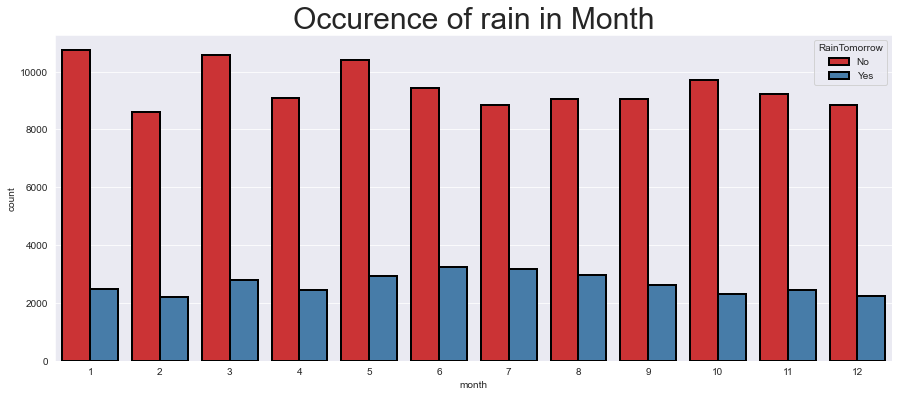

In [21]:
sns.set_style('darkgrid')
sns.set_palette('Set1')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'month', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              data = df)
ax.set_title("Occurence of rain in Month",size = 30 )
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa terjadinya hujan di tiap bulan umumnya tidak hujan di hari berikutnya.

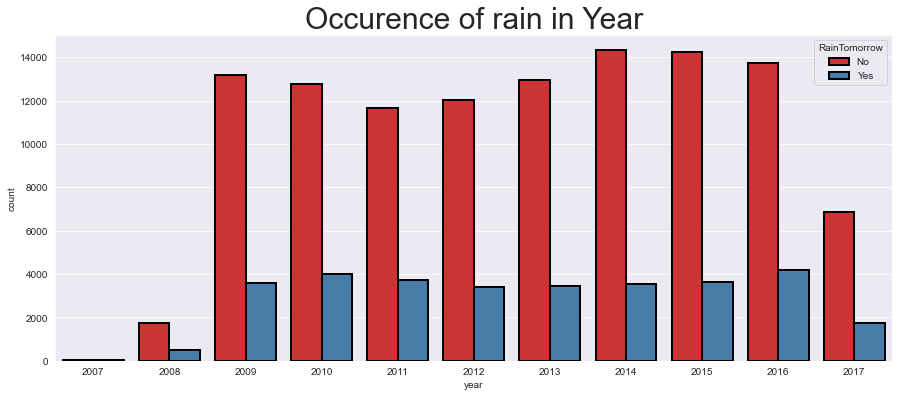

In [22]:
sns.set_style('darkgrid')
sns.set_palette('Set1')
plt.figure(figsize=[15,6])
ax = sns.countplot(x = 'year', hue = 'RainTomorrow',edgecolor=(0,0,0),
                  linewidth=2,
              data = df)
ax.set_title("Occurence of rain in Year",size = 30 )
plt.show()

**interpretasi**

berdasarkan plot diatas, terlihat bahwa terjadinya hujan di tiap tahun umumnya tidak hujan di hari berikutnya.

## Displot

C:\Users\Yona Ade Hermawan\AppData\Local\Temp\ipykernel_15412\372756756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MinTemp, kde = False).set_title("Displot")


Text(0.5, 1.0, 'Displot')

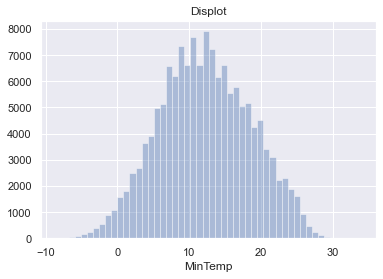

In [23]:
sns.set(color_codes = True)
sns.distplot(df.MinTemp, kde = False).set_title("Displot")

**interpretasi**

berdasarkan plot diatas, terlihat bahwa rata-rata suhu minimum di Australia berada diantara 20 dan 23 derajat.

## Scatter Plot

Text(0.5, 1.0, 'Scatter Plot')

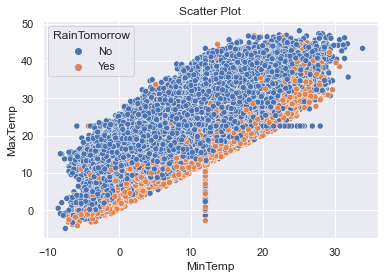

In [25]:
sns.scatterplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = df).set_title("Scatter Plot")

**interpretasi**

berdasarkan plot diatas, terlihat bahwa korelasi antar variabel MaxTemp dan MinTemp ketika memiliki suhu tinggi, lebih umum tidak hujan di hari berikutnya.

Text(0.5, 1.0, 'Scatter Plot')

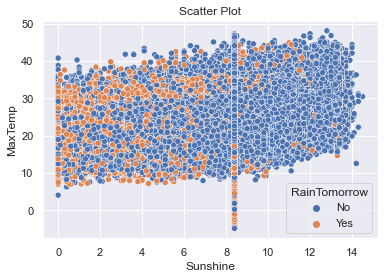

In [26]:
sns.scatterplot(x='Sunshine', y = 'MaxTemp', hue = "RainTomorrow", data = df).set_title("Scatter Plot")

**interpretasi:**

berdasarkan output diatas, terlihat bahwa korelasi variabel MaxTemp dan Sunshine ketika memiliki suhu tinggi di Sunshine, lebih umum tidak hujan di hari berikutnya.

# Pre-processing

In [27]:
label_encoder = preprocessing.LabelEncoder()
df['Location']= label_encoder.fit_transform(df['Location'])
df['WindGustDir']= label_encoder.fit_transform(df['WindGustDir'])
df['WindDir9am']= label_encoder.fit_transform(df['WindDir9am'])
df['WindDir3pm']= label_encoder.fit_transform(df['WindDir3pm'])
df['RainToday']= label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

In [28]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [29]:
df.drop(columns=['Date', 'year', 'month', 'day'], axis=1, inplace=True)

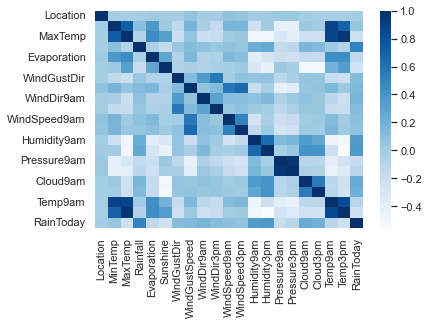

In [30]:
matriks_korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corr()
sns.heatmap(matriks_korelasi, cmap='Blues');

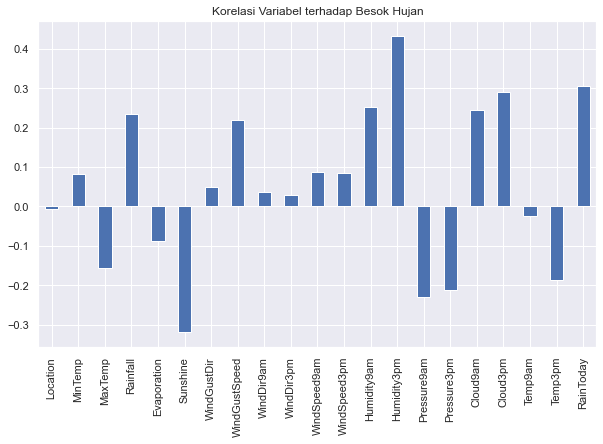

In [31]:
fig,ax = plt.subplots(figsize=(10,6))
korelasi = df.drop(columns=['RainTomorrow'], inplace=False).corrwith(df.RainTomorrow)
korelasi.plot.bar(title='Korelasi Variabel terhadap Besok Hujan');

berdasarkan plot diatas, maka akan menggunakan variabel yang memiliki korelasi positif karena memiliki pengaruh terhadap variabel target "RainTomorrow." selanjutnya, akan dibuat tabel baru yang berisikikan variabel-variabel berpengaruh terhadap variabel target "RainTomorrow."

In [32]:
df_fix = df[['Location','MinTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Cloud9am','Cloud3pm','RainToday','RainTomorrow']]
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [33]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [34]:
#split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Logistic Regression

In [35]:
#menentukan model klasifikasi
model = LogisticRegression()

#training model
model.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Model Training

In [36]:
#prediksi respon untuk dataset test
y_pred = model.predict(X_test)

#membuat hasil prediksi raintomorrow
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['Predicted_RainTomorrow'] = y_pred
df_test.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Predicted_RainTomorrow
100721,22,15.0,18.9,4.2,6.6,8.0,6,54.0,6,7,24.0,31.0,73.0,64.0,1005.2,1003.7,4.0,5.0,17.3,17.6,1,0
30234,37,13.1,26.8,0.0,4.6,10.9,13,39.0,13,14,22.0,15.0,61.0,22.0,1013.0,1009.0,0.0,1.0,16.9,25.9,0,0
68427,18,19.0,29.0,0.0,11.0,5.6,3,59.0,3,3,39.0,22.0,50.0,38.0,1006.5,1003.4,5.0,5.0,24.2,27.2,0,0
28624,34,18.1,32.2,0.0,2.1,8.4,4,30.0,3,4,0.0,17.0,99.0,51.0,1019.2,1014.6,5.0,5.0,20.9,31.6,0,0
31173,37,13.9,19.6,14.0,1.2,5.4,11,50.0,12,8,17.0,22.0,90.0,64.0,1017.6,1018.4,7.0,6.0,15.5,19.1,1,1
573,2,0.6,11.9,0.2,4.8,8.4,13,22.0,12,7,2.0,11.0,99.0,54.0,1024.3,1021.8,1.0,2.0,2.8,11.5,0,0
120056,32,21.8,36.2,0.0,12.2,11.9,0,61.0,5,7,31.0,30.0,14.0,12.0,1014.9,1013.2,6.0,0.0,31.2,33.4,0,0
43057,47,17.7,22.3,0.0,4.8,8.4,10,54.0,3,8,13.0,37.0,70.0,80.0,1012.8,1014.3,5.0,7.0,16.7,17.0,0,1
28966,34,18.4,25.7,2.6,1.2,8.4,4,24.0,3,5,0.0,2.0,100.0,64.0,1026.5,1023.3,5.0,5.0,19.8,24.2,1,0
90691,14,22.0,27.9,16.6,4.8,8.4,10,61.0,10,8,31.0,30.0,77.0,78.0,1021.4,1020.9,5.0,5.0,25.3,23.8,1,1


berdasarkan tabel diatas, dapat dilihat bahwa sudah ada hasil prediksi keesokan hari hujan dari implementasi model linear regression. selanjutnya, akan mengevaluasi model untuk melihat nilai akurasi dan MSE dari model linear regression.

# Model Evaluasi

In [37]:
print("Accuracy Score:", str(model.score(X_test, y_test)))
print("Mean Squared Error:", str(mean_squared_error(y_test, y_pred)))

Accuracy Score: 0.8390279114533205
Mean Squared Error: 0.1609720885466795


**interpretasi**

berdasarkan output diatas, terlihat bahwa model linear regression memiliki nilai akurasi yang tinggi sebesar 0.8388904166093771 atau sekitar 83.88% dengan nilai MSE sebesar 0.16110958339062284.

# SVM

In [ ]:
#menentukan model klasifikasi
model_svm = SVC(kernel='linear', probability=True)

#training model
model_svm.fit(X_train, y_train)

#prediksi respon untuk dataset test
y_pred1 = model_svm.predict(X_test) 

## Model Training

In [ ]:
#prediksi respon untuk dataset test
y_pred1 = model_svm.predict(X_test)

#membuat hasil prediksi raintomorrow
test = X_test.copy()
df_test = pd.DataFrame(test)
df_test['Predicted_RainTomorrow'] = y_pred
df_test.head(10)

# Pickle

In [ ]:
import pickle
pickle.dump(model_lr, open('rain_pred_model.pkl', 'wb'))

# Model Inference

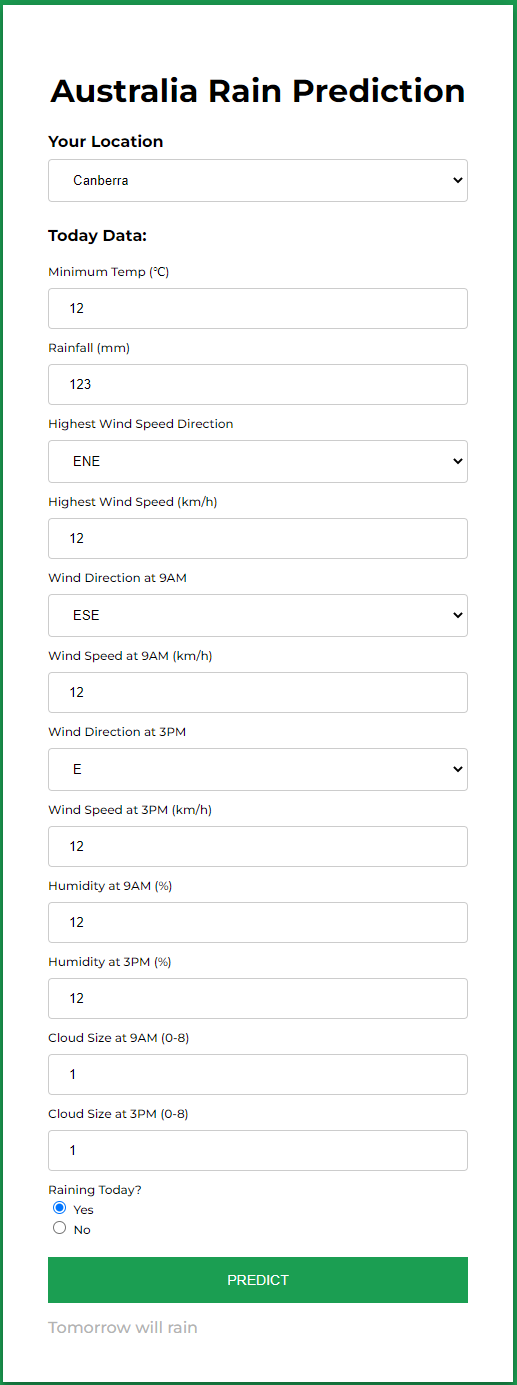

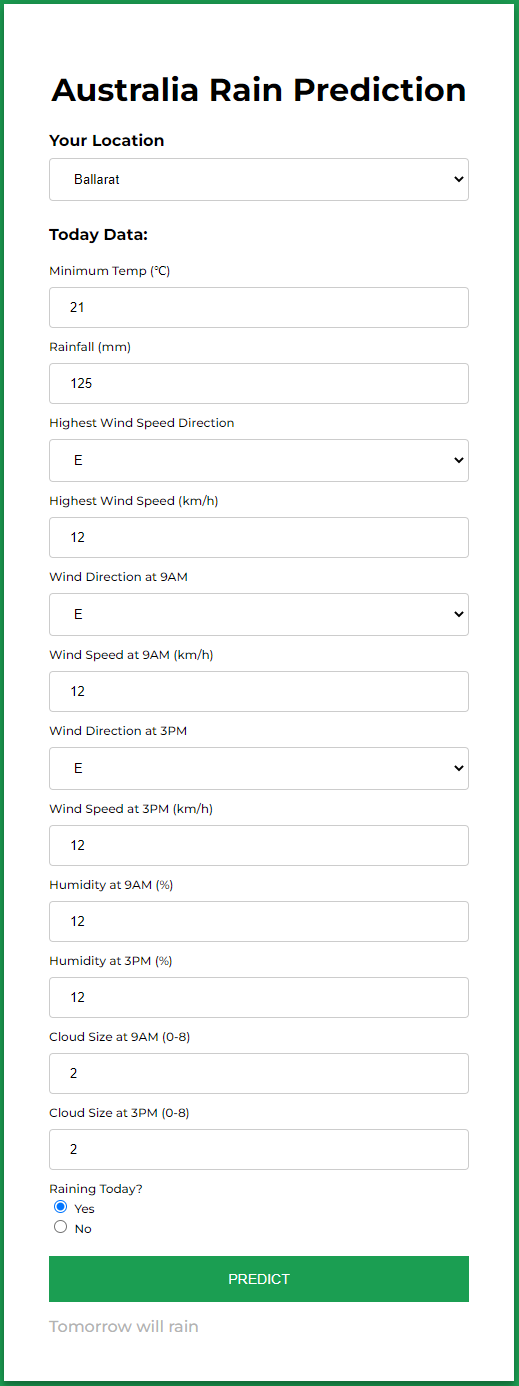

# Kesimpulan

- Dari kedua model tersebut dihasilkan akurasi 83.88% tetapi untuk precision menebak bahwa besok hujan (target = 1), SVM memiliki nilai precision yang lebih tinggi dibandingkan LogisticRegression
- Fitur - fitur yang digunakan untuk membuat model sudah tepat sasaran.